In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [3]:
#Generate two Gaussian Distributed Classes

np.random.seed(42)

mean1 = [0,0]
mean2 = [3,3]

cov1 = [[1.0,0.6],[0.6,1.0]]
cov2 = [[1.0,-0.4],[-0.4,1.0]]

X1 = np.random.multivariate_normal(mean1,cov1,100)
X2 = np.random.multivariate_normal(mean2,cov2,100)

In [6]:
X = np.vstack((X1,X2))
y = np.array([0]*100 + [1]*100)

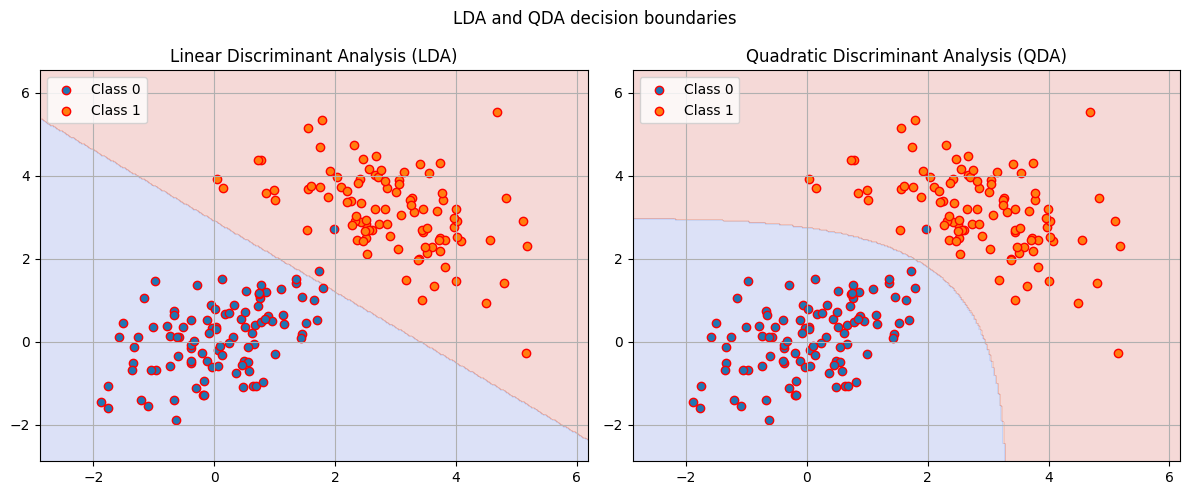

In [7]:
#Training LDA and QDA

lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

lda.fit(X,y)
qda.fit(X,y)


# create a gird to visualize decision boundaries

x_min, x_max = X[:,0].min() - 1 , X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1 , X[:,1].max() + 1


xx,yy = np.meshgrid(np.linspace(x_min,x_max,300),
                    np.linspace(y_min,y_max,300))

grid = np.c_[xx.ravel(),yy.ravel()]

Z_lda = lda.predict(grid).reshape(xx.shape)
Z_qda = qda.predict(grid).reshape(xx.shape)

#Plot
fig, axes = plt.subplots(1,2, figsize = (12,5))


#LDA plot

axes[0].contourf(xx,yy,Z_lda, alpha=0.2,cmap='coolwarm')
axes[0].scatter(X1[:,0],X1[:,1],label='Class 0', edgecolor='red')
axes[0].scatter(X2[:,0],X2[:,1],label='Class 1', edgecolor='red')
axes[0].set_title('Linear Discriminant Analysis (LDA)')
axes[0].legend()
axes[0].grid(True)

#QDA plot

axes[1].contourf(xx,yy,Z_qda, alpha=0.2,cmap='coolwarm')
axes[1].scatter(X1[:,0],X1[:,1],label='Class 0', edgecolor='red')
axes[1].scatter(X2[:,0],X2[:,1],label='Class 1', edgecolor='red')
axes[1].set_title('Quadratic Discriminant Analysis (QDA)')
axes[1].legend()
axes[1].grid(True)

plt.suptitle('LDA and QDA decision boundaries')
plt.tight_layout()
plt.show()